<a href="https://colab.research.google.com/github/dfish357-566/korean-sentence-visual/blob/main/konlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

!pip install svgling

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 46.7MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
     |████████████████████████████████| 71kB 3.8MB/s 


In [ ]:
from konlpy.tag import Okt
okt = Okt()
from konlpy.tag import Hannanum
hannanum = Hannanum()
from konlpy.tag import Kkma
kkma = Kkma()

from termcolor import colored
import svgling

In [ ]:
#hangug = hannanum.pos(u'세 소년이 걸었다', ntags=22)
#hangug = hannanum.pos(u'나는 케이크를 먹는다', ntags= 22)
#hangug = hannanum.pos(u'모든 빠른 소년 냄새', ntags=22)

hangug = hannanum.pos(u'프랑스에서 왔어요? 와!', ntags=22)


types = {"NC": "red", 
         "JX": "green", "JP": "green", "JC": "green",
         "NP": "blue",
         "PV": "yellow",
         "PA": "grey",
         "NN": "magenta",
         "MM": "white"
         }


print(colored("Proper Noun:  Blue", "blue"))
print(colored("Postposition: Green", "green"))
print(colored("Common Noun:  Red", "red"))
print(colored("Verb:         Yellow", "yellow"))
print(colored("Modifier:     White", "white"))
print(colored("Adjective:    Grey", "grey"))
print(colored("Numeral:      Magenta", "magenta"))
print()


print("프랑스에서 왔어요? 와!")

print(hangug)
pos = [i[1] for i in hangug]
words = [i[0] for i in hangug]

print(pos)
i = 0
while i < len(words):
  if pos[i][0] == "E" or pos[i][0] == "S":
    words[i-1] = words[i-1] + words[i]
    words.remove(words[i])
    pos.remove(pos[i])
    continue
  i += 1

print(pos)
print(words)

hangug = tuple(zip(words, pos))
print(hangug)

for i in range(0,len(hangug)):
  if pos[i] == "PX":
    print(colored(words[i], "yellow", attrs=['bold']), end='')
    continue
  
  try:
    if types[pos[i+1]] == "green":
      print(colored(words[i], types[pos[i]]), end='')
    else:
      print(colored(words[i], types[pos[i]]), end=' ')
  except:  
      print(colored(words[i], types[pos[i]]), end='')

Proper Noun:  Blue
Postposition: Green
Common Noun:  Red
Verb:         Yellow
Modifier:     White
Adjective:    Grey
Numeral:      Magenta

프랑스에서 왔어요? 와!
[('프랑스', 'NC'), ('에서', 'JC'), ('오', 'PX'), ('아', 'EP'), ('아', 'EF'), ('요', 'JX'), ('?', 'SF'), ('오', 'PV'), ('아', 'EC'), ('!', 'SF')]
['NC', 'JC', 'PX', 'EP', 'EF', 'JX', 'SF', 'PV', 'EC', 'SF']
['NC', 'JC', 'PX', 'JX', 'PV']
['프랑스', '에서', '오아아', '요?', '오아!']
(('프랑스', 'NC'), ('에서', 'JC'), ('오아아', 'PX'), ('요?', 'JX'), ('오아!', 'PV'))
프랑스에서오아아요? 오아!

In [ ]:
for i in range(0,len(hangug)):
  prevPos = hangug[i-1][1]

  types['EP'] = types[prevPos]
  types['EC'] = types[prevPos]
  types['ET'] = types[prevPos]
  types['EF'] = types[prevPos]
  
  pos = hangug[i][1]
  #nextPos = hangug[i+1][1]
  #print(pos, end=' ')
  if types[pos] == "green" and i != len(hangug)-1:
    print(colored(hangug[i][0], types[pos]), end=' ')

  elif types[pos] == "magenta":
    print(colored(hangug[i][0], types[pos]), end=' ')

  elif types[pos] == "white":
    print(colored(hangug[i][0], types[pos]), end=' ')

  else:
    print(colored(hangug[i][0], types[pos]), end='')

In [ ]:
import nltk
from nltk import Tree


# POS tag a sentence
sentence = u'가게에 갈 게요. 내 삼촌은 치즈를 팔았다.'
words = Hannanum().pos(sentence)
for word in words:
  print(word)

# Define a chunk grammar, or chunking rules, then chunk
grammar = """
NP: {<N.*><J.*>?<E.*>?}
VP: {<P.*><E.*>?}   
          
"""
parser = nltk.RegexpParser(grammar)
chunks = parser.parse(words)
print("# Print whole tree")
print(chunks.pprint())
Tree.fromstring(str(chunks)).pretty_print()



('가게', 'N')
('에', 'J')
('가', 'P')
('ㄹ', 'E')
('게요', 'N')
('.', 'S')
('내', 'N')
('삼촌', 'N')
('은', 'J')
('치즈', 'N')
('를', 'J')
('팔', 'P')
('아다', 'E')
('.', 'S')
# Print whole tree
(S
  (NP 가게/N 에/J)
  (VP 가/P ㄹ/E)
  (NP 게요/N)
  ./S
  (NP 내/N)
  (NP 삼촌/N 은/J)
  (NP 치즈/N 를/J)
  (VP 팔/P 아다/E)
  ./S)
None
                                  S                                             
  ________________________________|______________________________________        
 |   |        NP          VP      NP   NP       NP           NP          VP     
 |   |    ____|___     ___|___    |    |    ____|___     ____|___     ___|___    
./S ./S 가게/N     에/J 가/P     ㄹ/E 게요/N 내/N 삼촌/N     은/J 치즈/N     를/J 팔/P     아다/E



(S
  (NP 가게/N 에/J)
  (VP 가/P ㄹ/E)
  (NP 게요/N)
  ./S
  (NP 내/N)
  (NP 삼촌/N 은/J)
  (NP 치즈/N 를/J)
  (VP 팔/P 아다/E)
  ./S)


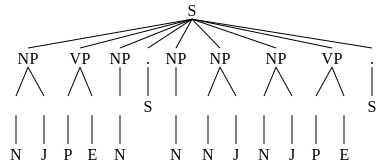

In [ ]:
import nltk
svgling.disable_nltk_png()

print(chunks)
svgling.draw_tree(chunks)